In [72]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [73]:

# The model maps sentences & paragraphs to a 384 dimensional dense
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence fsd s ddskf kjhj h  fjh fjld shgj hjkfghsjkd ghjksfhg kjsfhgjk shdgjk hfjlg hls ghjksf hgljk sfhdgj hslfj ghjfsd hgljf dhgljshfgjlkfhgjkl hsdfghf jlhkjfh gkjf shdgjk fhjl ghfslgj pre ogjklsfngsuhgirojgrgoksfk ',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

print(embeddings.shape)

RS = 1000

(3, 384)


In [74]:
kmeans = MiniBatchKMeans(n_clusters=3, random_state=0).fit(embeddings)
Y=kmeans.labels_
z = pd.DataFrame(Y.tolist())
labels = [0, 1, 2]
labels = pd.Series(labels)
labels

0    0
1    1
2    2
dtype: int64

In [76]:
digits_proj = TSNE(learning_rate='auto', random_state=RS).fit_transform(embeddings)
print(digits_proj.shape)

/home/abhishek/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(3, 2)


In [27]:
Sample_data1 = digits_proj[0:10,0].tolist()
print(Sample_data1)
Sample_data1 = pd.Series(Sample_data1)
Sample_data1


[65.01240539550781, 154.56932067871094, 55.123931884765625]


0     65.012405
1    154.569321
2     55.123932
dtype: float64

In [28]:
Sample_data2 = digits_proj[0:10,1].tolist()
Sample_data2 = pd.Series(Sample_data2)
Sample_data2

0    146.310898
1     83.187202
2     37.190971
dtype: float64

In [29]:
Clutsr_L = Y[0:10].tolist()
Clutsr_L = pd.Series(Clutsr_L)
Clutsr_L

0    0
1    2
2    1
dtype: int64

In [30]:
Data_with_label = pd.DataFrame()
Data_with_label["x"] = Sample_data1
Data_with_label["y"] = Sample_data2
Data_with_label["Label"] = labels
Data_with_label["Cluster"] = Clutsr_L

In [31]:
display(Data_with_label)

,x,y,Label,Cluster
0,65.012405,146.310898,0,0
1,154.569321,83.187202,1,2
2,55.123932,37.190971,2,1


In [34]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 18))

    # We create a scatter plot.
    f = plt.figure(figsize=(48, 48))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=100,
                    c=palette[colors.astype(np.int)])
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    ax.axis('on')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(3):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=64)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

/tmp/ipykernel_3089/3272891076.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=palette[colors.astype(np.int)])


(<Figure size 3456x3456 with 1 Axes>,
 <AxesSubplot:>,
 [Text(65.012405, 146.3109, '0'),
  Text(55.12393, 37.19097, '1'),
  Text(154.56932, 83.1872, '2')])

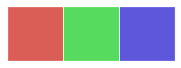

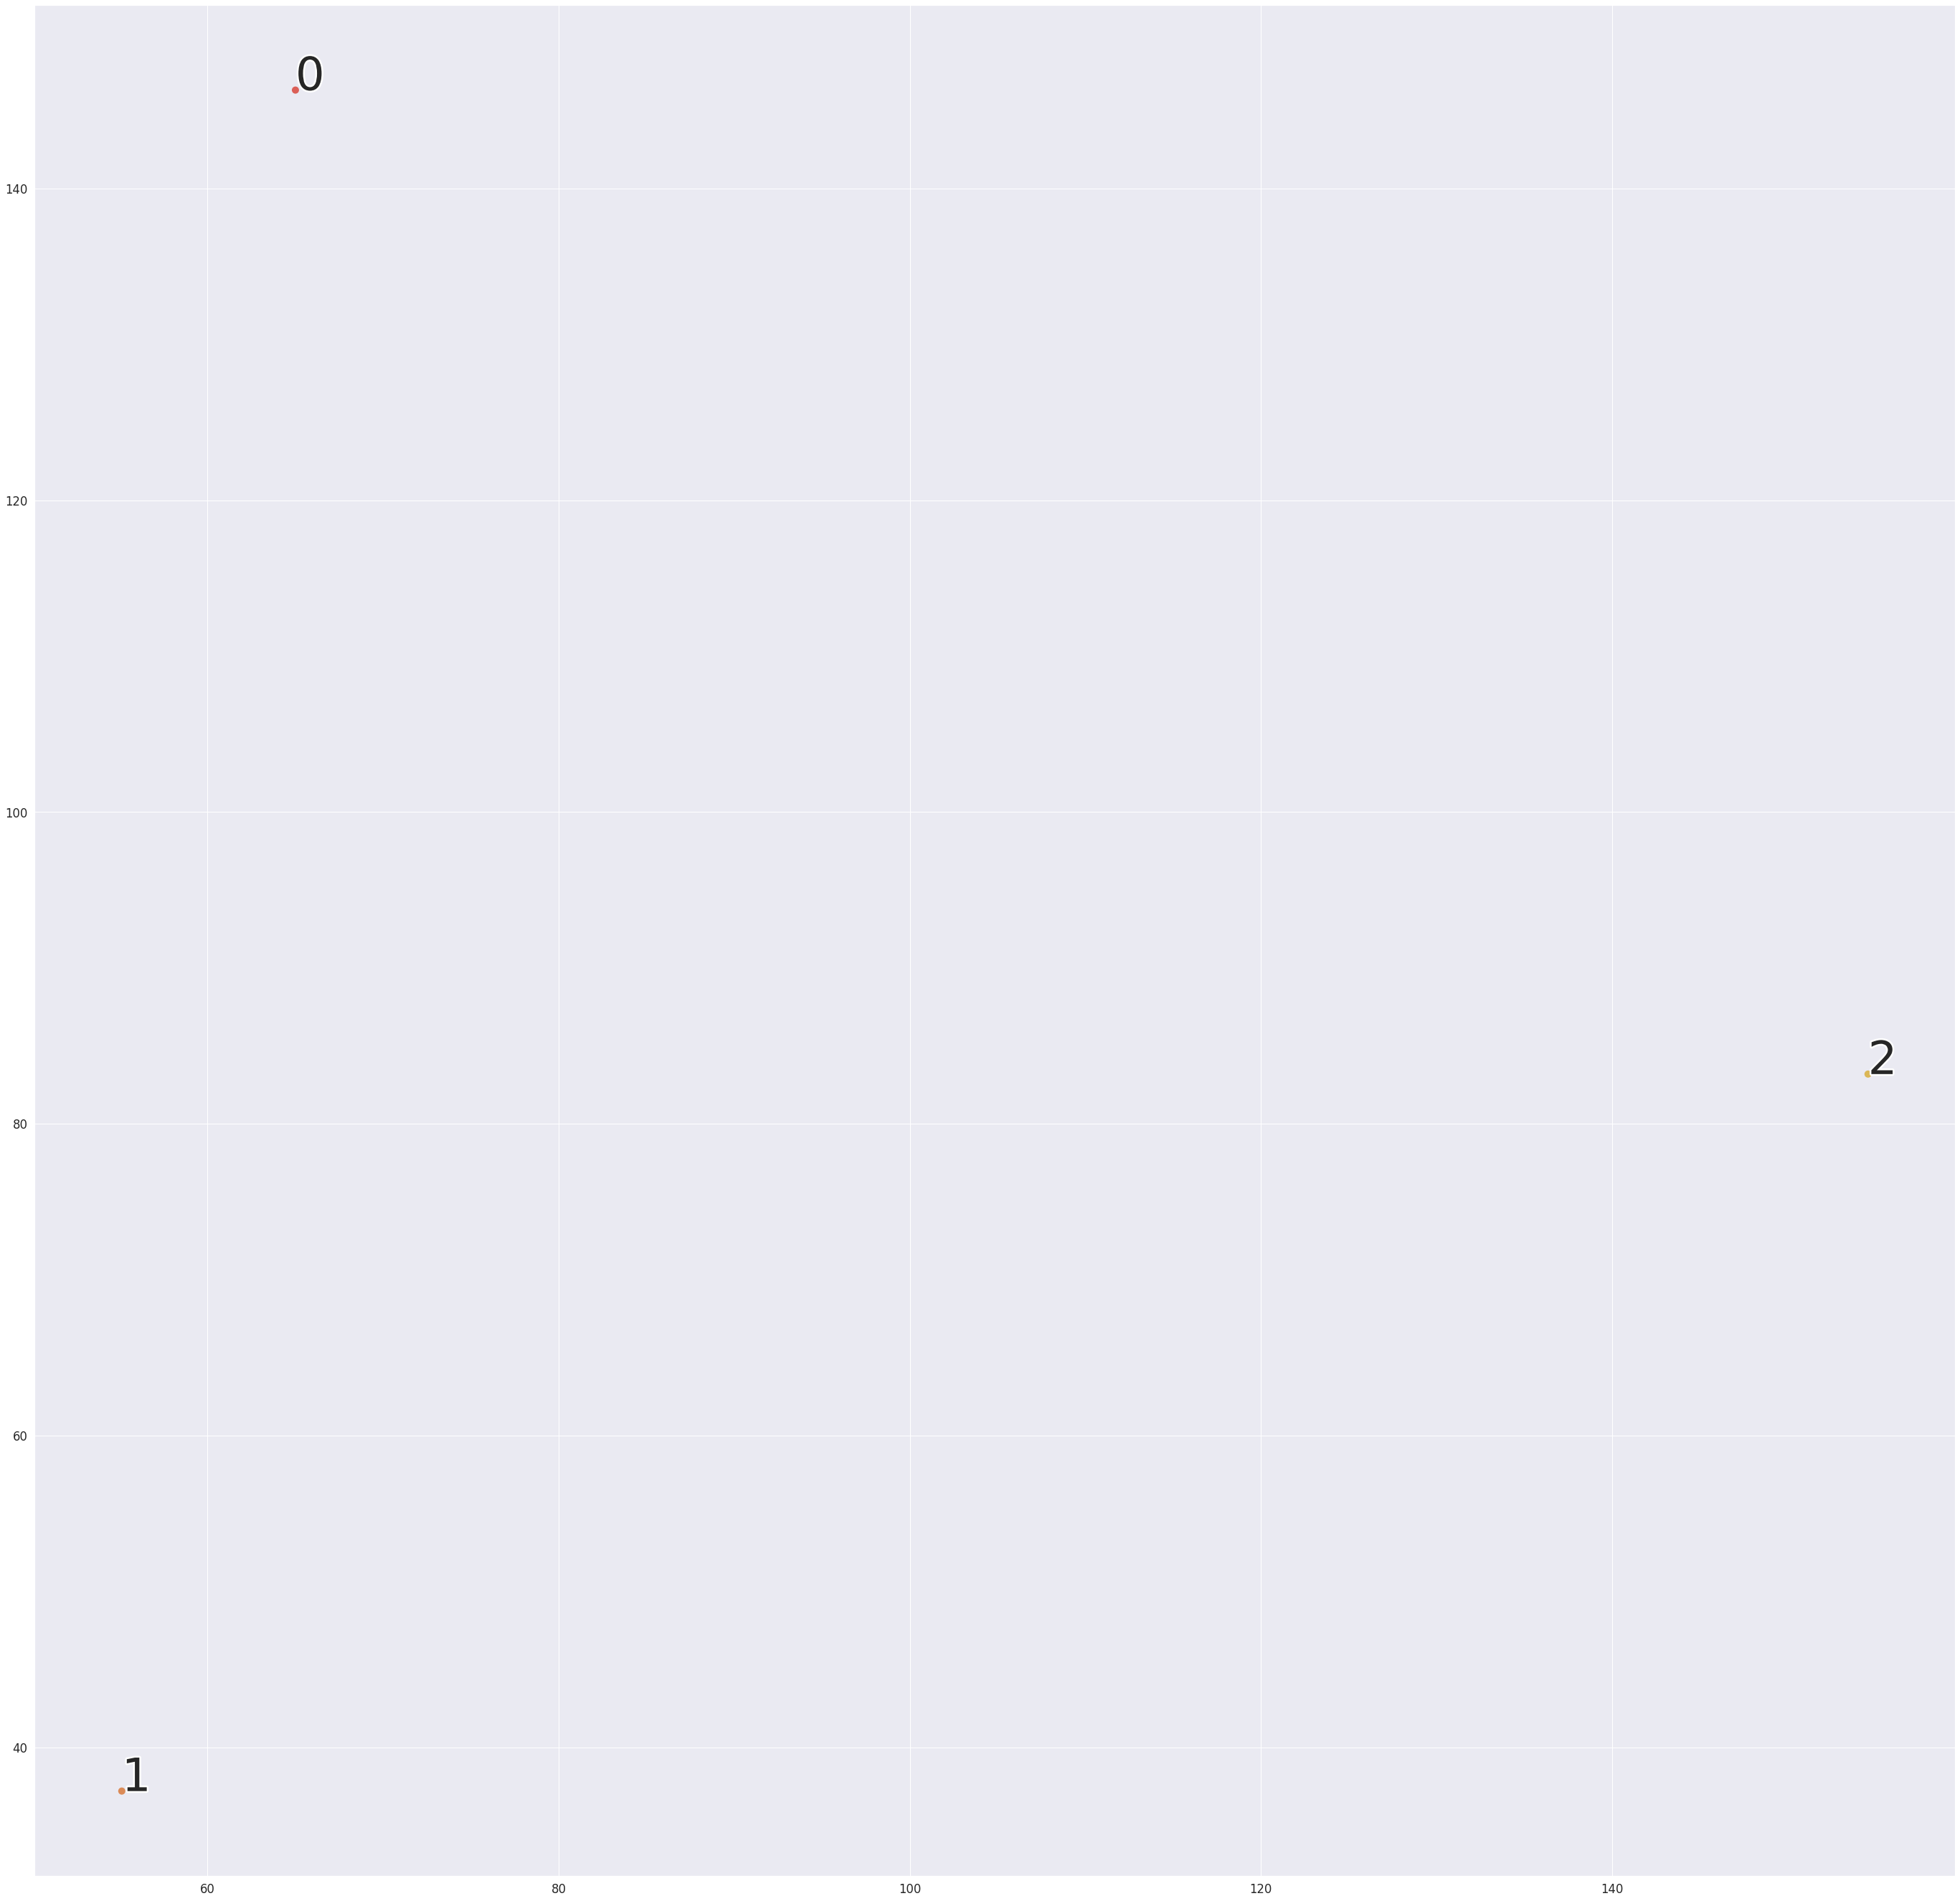

In [35]:
sns.palplot(np.array(sns.color_palette("hls", 3)))
scatter(digits_proj, Y)

In [61]:
print(digits_proj.shape)
print(digits_proj)
N = 10
data = np.array(digits_proj)
# print(data)
# print( np.random.normal(loc=[0, 1], scale=[0.5, 0.75], size=(N, 2)))
data += np.random.normal(loc=[0, 1], scale=[0.5, 0.75], size=(N, 2))
# data

(3, 2)
[[ 65.012405 146.3109  ]
 [154.56932   83.1872  ]
 [ 55.12393   37.19097 ]]


ValueError: operands could not be broadcast together with shapes (3,2) (10,2) (3,2) 

In [12]:
from datetime import datetime
from elasticsearch import Elasticsearch

elastic_url = "https://localhost:9200"
user = "elastic"
password = "y31tB4rL8+YdxZWOsSR0"

def connect_elasticsearch():
    _es = None
    _es = Elasticsearch([elastic_url], 
    ssl_show_warn=False, verify_certs=False, basic_auth=(user, password))
    print(_es.info())
    if _es.ping():
        print('Yay Connect')
    else:
        print('Awww it could not connect!')
    return _es

es = connect_elasticsearch()


# for hit in resp['hi']:
#     print("%(timestamp)s %(author)s: %(text)s" % hit["_source"])ts']['hits

{'name': 'abhishekVB', 'cluster_name': 'elasticsearch', 'cluster_uuid': 'AJiQJU1_TLm0DO2ywBYK7A', 'version': {'number': '8.1.3', 'build_flavor': 'default', 'build_type': 'deb', 'build_hash': '39afaa3c0fe7db4869a161985e240bd7182d7a07', 'build_date': '2022-04-19T08:13:25.444693396Z', 'build_snapshot': False, 'lucene_version': '9.0.0', 'minimum_wire_compatibility_version': '7.17.0', 'minimum_index_compatibility_version': '7.0.0'}, 'tagline': 'You Know, for Search'}
Yay Connect
Got 112 Hits:
10


In [15]:
import time
starttime = time.time()
while True:
    print("tick")
    time.sleep(30.0 - ((time.time() - starttime) % 30.0))
    response = es.search(index="tweet", query={
    "bool": {
      "filter": {
        "range": {
          "date": {
            "gte": "now-30m",
            "lt": "now"
                }
            }
        }
    }
    })
    total = response['hits']['total']['value']
    data = response['hits']["hits"]
    got = len(data)
    assert total == got
    print("Got %d Hits:" % response['hits']['total']['value'])
    print(len(response['hits']["hits"]))    


tick
tick
tick


KeyboardInterrupt: 